## Proyecto 1.

Resolución con 221 datos y 3 polinomios:

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as mplt

#Extraer documento
archivo = 'Pruebas de luminiscencia_proyecto.csv'

#Leer documento
data = pd.read_csv(archivo)
data

,Wavelenght (nm),celda 1,celda 2,celda 3,Unnamed: 4
0,580,176,149,180,NaN
1,581,160,56,145,
2,582,156,141,77,NaN
3,583,208,154,148,NaN
4,584,205,127,123,NaN
...,...,...,...,...,...
216,796,420,666,246,NaN
217,797,375,618,217,NaN
218,798,386,593,271,NaN
219,799,398,686,253,NaN


In [2]:
#Importar datos
x = data.iloc[:,0]
y = data.iloc[:,1]

#Preparar datos (normlizar x & y)
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

In [3]:
# Definir funcion objetivo
def f_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [4]:
#Ajustar polinomios 
#Polinomio de grado 1
b1 = np.zeros(2)
ajuste1 = opt.minimize(f_obj, b1, args=(x_norm,y_norm,1))

#Polinomio de grado 2
b2 = np.zeros(3)
ajuste2 = opt.minimize(f_obj, b2, args=(x_norm,y_norm,2))

#Polinomio de grado 3
b3 = np.zeros(4)
ajuste3 = opt.minimize(f_obj, b3, args=(x_norm,y_norm,3))

In [5]:
#Declarar el vector y
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)

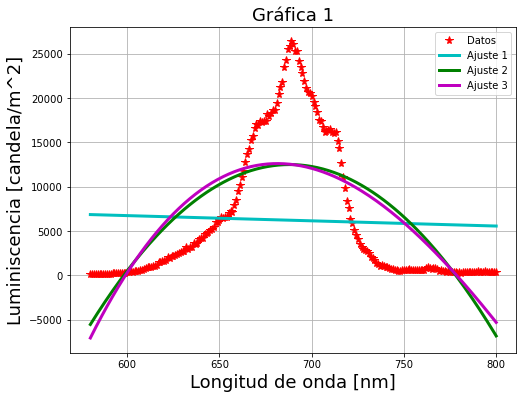

In [6]:
#Graficar datos de población contra los años, y los polinomios ajustados
mplt.figure(figsize=(8,6))

mplt.plot(x, y, 'r*', ms=8, label='Datos')
mplt.plot(x, yhat1, 'c', lw=3, label='Ajuste 1')
mplt.plot(x, yhat2, 'g', lw=3, label='Ajuste 2')
mplt.plot(x, yhat3, 'm', lw=3, label='Ajuste 3')

mplt.xlabel('Longitud de onda [nm]',fontsize=18)
mplt.ylabel('Luminiscencia [candela/m^2]',fontsize=18)

mplt.title('Gráfica 1',fontsize=18)
mplt.grid()
mplt.legend(loc='best')
mplt.show()